In [51]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, 
                        fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Ensemble
It means combining multiple models.

__wisdom of the crowd__: If we pose a complex question to thousands of people and aggregate their answer. the aggregated ans is better than an expert's answer.

__ensemble__: If we aggregate the predictions of a group of predictors then, their prediction is better than the best individual predictor.
This learning technique is called _ensemble learning_ and an ensemble learning algorithm is called _ensemble method_.

Ensemble method is often used at the end of project. By the end of the project, few good predictors are already built so, we can combine them into even better predictions

## Voting Classifiers
It means majority of the vote given by model will be considered.<br>
The better way to classify is to aggregate the predictions of each classifier and predicting the class that gets the most vote.

__hard voting classifier__: majority vote classifier


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr',log_clf), ('rf',rnd_clf), ('svc',svm_clf)],
    voting='hard')
voting_clf.fit(x_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [54]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


__soft voting classifier__:If all classifiers are able to estimate class probabilities (i.e., they all have a predict_proba() method), then we can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers.

In [55]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [('lr',log_clf), ('rf',rnd_clf), ('svc',svm_clf)],
    voting='soft')
voting_clf.fit(x_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [56]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## Bagging and Pasting
__bagging__: Short for _bootstrap aggregating_. When sampling is performed with replacement.<br>
__pasting__: When sampling is performed without replacement.

After all predictors are trained, the ensemble make a prediction for a new instance by simply aggregating the predicitons of all
predictor (like hard voting vlassifier). Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.

Bagging and pasting are __popular__ as they allow predictions to be made in parallel via different CPU cores or different servers. They scale well.

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(x_train,y_train)
y_pred = bag_clf.predict(x_test)

In [58]:
print(accuracy_score(y_test,y_pred))

0.92


In [59]:
past_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42))
past_clf.fit(x_train,y_train)
y_pred = past_clf.predict(x_test)

In [60]:
print(accuracy_score(y_test,y_pred))

0.904


Saving figure decision_tree_without_and_with_bagging_plot


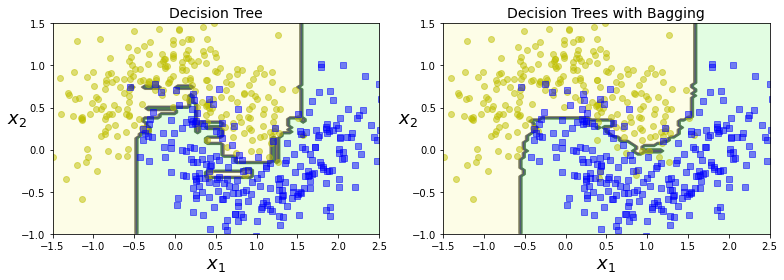

In [61]:
# out of the book code

from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, x, y, axes=[-1.5, 2.5, -1, 1.5],
                          alpha=0.5, contour=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)   
    x1,x2 = np.meshgrid(x1s,x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", alpha=alpha)
        plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(past_clf, x, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

Above, ensemble's prediction generalize much better than single decision tree's prediction

## Out of bag (oob) instances
In bagging, only about 63% of the training instances are sampled on
average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances.

In [62]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train,y_train)
bag_clf.oob_score_

0.896

Above, we get 89.6% accuracy on test set acc to oob evaluation.

In [63]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.904

Also, we get 89.6% accuracy on the test set

In [64]:
bag_clf.oob_decision_function_

array([[0.36040609, 0.63959391],
       [0.34554974, 0.65445026],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07853403, 0.92146597],
       [0.37823834, 0.62176166],
       [0.00540541, 0.99459459],
       [0.99447514, 0.00552486],
       [0.95789474, 0.04210526],
       [0.78431373, 0.21568627],
       [0.00507614, 0.99492386],
       [0.79581152, 0.20418848],
       [0.88235294, 0.11764706],
       [0.94818653, 0.05181347],
       [0.03703704, 0.96296296],
       [0.        , 1.        ],
       [0.97752809, 0.02247191],
       [0.93782383, 0.06217617],
       [0.98816568, 0.01183432],
       [0.02222222, 0.97777778],
       [0.39226519, 0.60773481],
       [0.92574257, 0.07425743],
       [1.        , 0.        ],
       [0.94350282, 0.05649718],
       [0.        , 1.        ],
       [0.99465241, 0.00534759],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.58757062, 0.41242938],
       [0.

In the above case, (since the base estimator has a predict_proba() method), the decision function returns the class probabilities for each training instance. For example, the oob evaluation estimates that the first training instance has a 64.55% probability of belonging to the positive class and 35.44% of belonging to the negative class.

## Random Patches and Random Subspaces
__Random patches__: sampling both training instances and features

__Random subspaces__: keeping all training instances (by setting bootstrap=False and max_samples=1) but sampling features (by setting
bootstrap features=True and/or max_features<1)

# Random Forests

In [65]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, 
                                 n_jobs=-1)
rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_test)

In [66]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

## Feature Importance

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris["feature_names"],
                       rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.08662663183461748
sepal width (cm) 0.024441745251729458
petal length (cm) 0.4573523005040275
petal width (cm) 0.43157932240962554


In [68]:
# out of book code

def plot_digit(data):
    image = data.reshape([28, 28])
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

## Boosting
Combining several weak learners into a strong learner

### AdaBoost
Short for _Adaptive Boosting_.<br>
It works by sequentially adding predictors to an ensemble, each one correcting its predecessor and tweaking the instance weights at every iteration.<br> Eg: The algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on.

Each instance weight $w^(i)$ is initially set to 1/m. A first predictor is trained, and its weighted error rate r_1 is computed on
the training set:

<div class="alert alert-block alert-info"><b>Eqn 1: </b>Weighted error rate of $j^{th}$ predictor<br> $r_j = \frac{

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

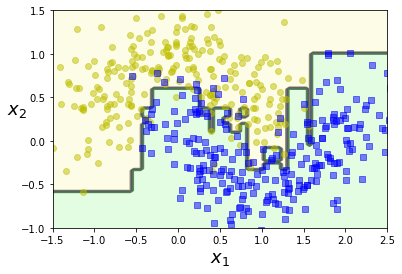

In [70]:
plot_decision_boundary(ada_clf, x, y)

Saving figure boosting_plot


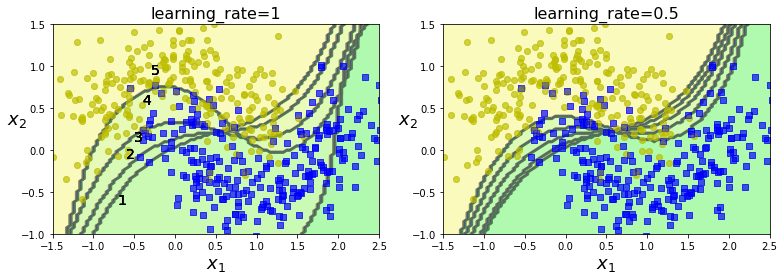

In [71]:
# out of the book code

m = len(x_train)

plt.figure(figsize=(11,4))
for subplot, learning_rate in ((121,1), (122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", 
                      random_state=42)
        svm_clf.fit(x_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(x_train)
        sample_weights[y_pred != y_train] *= (1+learning_rate)
        plot_decision_boundary(svm_clf, x, y, alpha=0.2)
        plt.title("learning_rate={}".format(learning_rate),fontsize=16)
        
        if subplot == 121:
            plt.text(-0.7, -0.65, "1", fontsize=14)
            plt.text(-0.6, -0.10, "2", fontsize=14)
            plt.text(-0.5,  0.10, "3", fontsize=14)
            plt.text(-0.4,  0.55, "4", fontsize=14)
            plt.text(-0.3,  0.90, "5", fontsize=14)
save_fig("boosting_plot")
plt.show()

### Gradient Boosting
Like adaboost, it also works by sequentially adding predictors to an ensemble, each one correcting its predecessor but this method tries to fit the new predictor to the _residual errors_ made by the previous predictor.<br>__Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT)__: using decision trees as the base predictors


In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x,y)

DecisionTreeRegressor(max_depth=2)

Now, training second DecisionTreeRegressor on the residual errors made by the first predictor.

In [73]:
y2 = y - tree_reg1.predict(x)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x,y2)

DecisionTreeRegressor(max_depth=2)

Training third DecisionTreeRegressor on the residual errors made by the second predictor.

In [74]:
y3 = y2 - tree_reg2.predict(x)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x,y3)

DecisionTreeRegressor(max_depth=2)

Now, we have an ensemble containing three trees. It can make predictions on a new instances simply by adding up the predictions of all the trees.

In [76]:
#x_new = np.array([[0.8]])
#y_pred = sum(tree.predict(x_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor (max_depth=2, n_estimators=3,
                                  learning_rate=1.0)
gbrt.fit(x, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

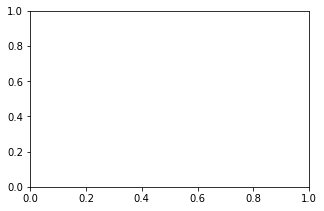

In [83]:
# out of the book code

def plot_predictions(regressors, x, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(x[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], x, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], x, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

__shrinkage__: A regularization technique where if we set learning_rate to a low value (such as 0.1) then we will need more trees in the ensemble to fit the training set, but the predictions will generalize better.

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

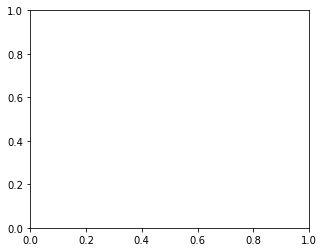

In [85]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

save_fig("gbrt_learning_rate_plot")
plt.show()

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(x,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train, y_train)

error = [mean_squared_error(y_val, y_pred)
        for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(error) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=91)

In [88]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [89]:
print(gbrt.n_estimators)

62


In [90]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.08335911966442455
